In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

# torch.manual_seed(1)

Text(0.5, 0, 'x')

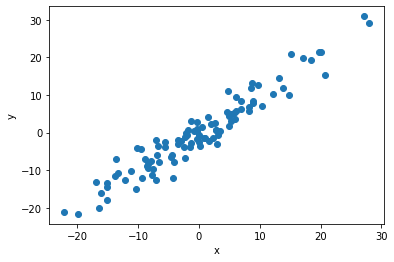

In [2]:
x = torch.randn(100, 1) * 10
y = x + torch.randn(100, 1) * 3
plt.plot(x.numpy(), y.numpy(), "o")
plt.ylabel("y")
plt.xlabel("x")

In [3]:
class LR(nn.Module):
    def __init__(self, input_size, output_size, learning_rate=None):
        if learning_rate is None:
            self.learning_rate = 1 / 100
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
model = LR(1, 1)

In [5]:
[w, b] = model.parameters()


def getparams():
    return (w[0, 0].item(), b[0].item())

In [6]:
def plot_fit(title):
    plt.title = title
    w1, b1 = getparams()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, "r")
    plt.scatter(x, y)
    plt.show()

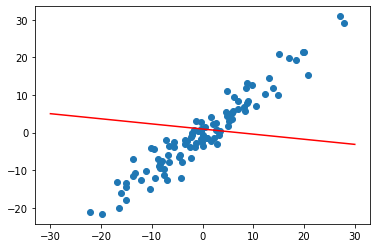

In [7]:
plot_fit("Inital Model")

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 17.79054069519043
epoch: 1 loss: 17.550189971923828
epoch: 2 loss: 17.316068649291992
epoch: 3 loss: 17.088010787963867
epoch: 4 loss: 16.865856170654297
epoch: 5 loss: 16.649459838867188
epoch: 6 loss: 16.438671112060547
epoch: 7 loss: 16.233339309692383
epoch: 8 loss: 16.033327102661133
epoch: 9 loss: 15.83849811553955
epoch: 10 loss: 15.648717880249023
epoch: 11 loss: 15.463848114013672
epoch: 12 loss: 15.283761024475098
epoch: 13 loss: 15.108336448669434
epoch: 14 loss: 14.937463760375977
epoch: 15 loss: 14.771017074584961
epoch: 16 loss: 14.608877182006836
epoch: 17 loss: 14.450932502746582
epoch: 18 loss: 14.297080993652344
epoch: 19 loss: 14.147208213806152
epoch: 20 loss: 14.001214981079102
epoch: 21 loss: 13.859004020690918
epoch: 22 loss: 13.720486640930176
epoch: 23 loss: 13.585554122924805
epoch: 24 loss: 13.454110145568848
epoch: 25 loss: 13.326068878173828
epoch: 26 loss: 13.201342582702637
epoch: 27 loss: 13.079851150512695
epoch: 28 loss: 12.9614963531494

Text(0.5, 0, 'Epoc')

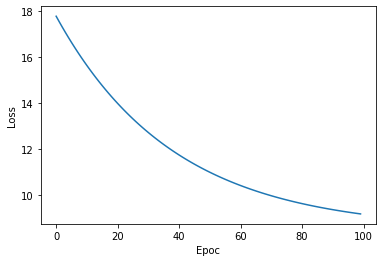

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoc")

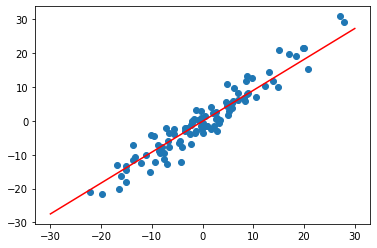

In [14]:
plot_fit("Trained Model")